# Tutorial 12: 
# Binnary Classification dengan Logistic Regression.ipynb

### 1. Formula Dasar pada Logistic Regression
- **Simple Linear Regression**
<br>y    = a + bx 
<br>g(x) = a + bx  # x pada fungsi ini bersifat tunggal atau 1 nilai feature

- **Multiple Linear Regression**
<br>y    = a + b1 * x1 + b2 * x2 + bn * xn 
<br>g(X) = a + bX # X pada fungsi ini bersifat jamak atau sekumpulan nilai feature

- **Logistic Regression**
<br>g(X)        = sigmoid(a+bX)
<br>-sigmoid(x) = 1 / (a+exp(-x))

### 2. Persiapan Dataset: SMS Spam Collection Data Set

In [2]:
import pandas as pd 

df = pd.read_csv('./dataset/SmsSpamCollection', 
                 sep    = '\t', 
                 header = None,
                 names  = ['label', 'sms'])

df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['label'].value_counts() # Menghitung jumlah label yang dikategorikan sebagai ham (bukan spam) dan spam. 

ham     4825
spam     747
Name: label, dtype: int64

Pada tahap ini kita akan menggunakan **Logistic Regression** untuk menentukan apakah suatu text dapat dikategorikan sebagai **ham atau spam**.

#### - Training & Testing Dataset
Pada tahap ini kita akan mencoba untuk menggunakan **Label Binarizer untuk memisahkan features dan target variable. Kemudian dikonversi menjadi bilangan biner yaitu 0 dan 1**.

In [4]:
from sklearn.preprocessing import LabelBinarizer

x  = df['sms'].values
y  = df['label'].values

lb = LabelBinarizer() # Merubah string menjadi bilangan biner, 0 dikategorikan sebagai ham sedangkan 1 adalah representasi dari spam
y  = lb.fit_transform(y).ravel() # Metode ravel() digunakan untuk merubah multi dimensional array menjadi satu dimensional array
lb.classes_ 

array(['ham', 'spam'], dtype='<U4')

In [5]:
from sklearn.model_selection import train_test_split # Memecah data test menjadi 2 bagian yaitu training dan testing

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.25, # Proporsi dari testing set terhadap training set
                                                    random_state=0)

print(x_train)
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear']
[0 1 0 ... 1 0 0]


#### - Feature Extraction dengan TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(stop_words='english')

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf  = vectorizer.transform(x_test)

print(x_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

### 3. Binary Classification dengan Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf) # Nilai yang mau kita prediksi adalah berdasarkan data feature yang terdapat pada x_test_tfidf

for pred, sms in zip(y_pred[:5], x_test[:5]): # Looping yang menghasilakan 5 hasil pertama
    print(f'Pred: {pred} - SMS: {sms}')

Pred: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@
Pred: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
Pred: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Pred: 0 - SMS: Sir Goodmorning, Once free call me.
Pred: 0 - SMS: All will come alive.better correct any good looking figure there itself..


### 4. Evaluasi Metrics pada Binary Classification
Terdapat beberapa metode untuk mengevaluasi Binnary Classification
- **Confusion Matrix**
- **Accuracy**
- **Precission & Recall**
- **F1 Score**
- **ROC**

Terminologi dasar: 
- **True Positive (TP)** adalah sesuatu yang bernilai positif, diprediksi secara tepat oleh model. Dalam konteks ini, **TP berarti model secara tepat dapat membedakan HAM sebagai HAM dan SPAM sebagai SPAM.**
- **True Negative (TN)** adalah sesuatu yang bernilai negatif, diprediksi secara tepat oleh model. Dalam konteks ini, **TN berarti model secara tepat dapat membedakan HAM bukan SPAM dan SPAM bukan HAM.**
- **False Positive (FP)** adalah sesuatu yang bernilai positf, telah keliru diprediksi sebagai negatif oleh model. Dalam konteks ini, **FP berarti model secara keliru membedakan data HAM sebagai SPAM dan data SPAM sebagai HAM.**
- **False Negative (FN)** adalah sesuatu yang bernilai negatif, telah keliru diprediksi sebagai positif oleh model. Dalam konteks ini, **FN berarti model scara keliru membedakan HAM bukan SPAM dan SPAM bukan HAM.**


#### - Confusion Matriks
Confusion matriks seringkali juga dikenal sebagai error matrix yang mana **berperan untuk menampilkan nilai True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).**

In [8]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [9]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 48
TP: 137


Untuk **memvisualisasikan conffusion matrix tersebut kita bisa menggunakan library matplotplib.**

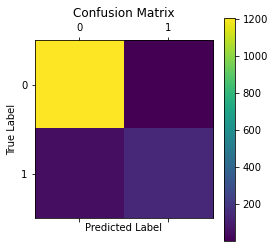

In [11]:
import matplotlib.pyplot as plt 

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### - Accuracy
Accuracy **mengukur porsi dari hasil prediksi yang tepat**. Secara matematis metode evaluasi ini dapat dituliskan sebagai berikut.
<br><br>
**Accuracy = (TP + TN) / (TP + TN + FP + FN) = correct / total**
<br>
Hasil dari evaluasi ini berada pada rentang 0 dan 1. Dimana **apabila hasil accuracy mendekati 1 maka semakin akurat**.

In [13]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_pred)

# Berdasarkan hasil dibawah ini, didapat nilai akurasi sebesar 96% yang mana cukup akurat. 

0.964824120603015

#### - Precission & Recall 
Selain menggunakan accuracy, performa dari suatu classifier umumnya juga dikukur berdasarkan nilai precission dan recall. 